In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../../personal-dev/ml/Machine-Learning-With-Python/position_salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
df =df.drop(columns="Position")
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [21]:
y = df["Salary"]
X = df.drop(columns="Salary")
X = pd.concat([pd.Series(1, X.index, name="00"),X], axis=1)

In [27]:
X["Level1"] = X["Level"]**2
X["Level2"] = X["Level"]**3
X = X/X.max()
X.head()

,00,Level,Level1,Level2
0,1.0,0.1,0.01,0.001
1,1.0,0.2,0.04,0.008
2,1.0,0.3,0.09,0.027
3,1.0,0.4,0.16,0.064
4,1.0,0.5,0.25,0.125


In [34]:
m = len(df)
theta = np.array([0]*len(X.columns))
def hypothesis(theta, X):
    return theta*X
def costFunction(theta, X, y):
    y1 = hypothesis(theta, X)
    y1 = np.sum(y1, axis=1)
    return sum((y1-y)**2)/(2*m)
def gradientDescent(theta, X, y , alpha, epoch):
    J=[]
    i=0
    while i < epoch:
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0,len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)*X.iloc[:, c])/m
        j = costFunction(theta, X, y)
        J.append(j)
        i+=1
    return J, j, theta

In [57]:
J, j, theta = gradientDescent(theta, X, y, 0.05, 500)

In [58]:
y_pred = hypothesis(theta, X)
y_pred = np.sum(y_pred, axis=1)

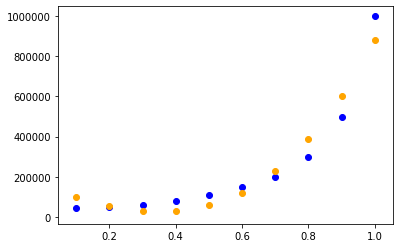

In [59]:
plt.figure()
plt.scatter(X["Level"], y, color="blue")
plt.scatter(X["Level"], y_pred, color="orange")
plt.show()